<a href="https://colab.research.google.com/github/nihalsaran/solar_ML/blob/main/Solar_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 19.340842660281506
R² Score: 0.9996705586197276
Model and scaler saved successfully!


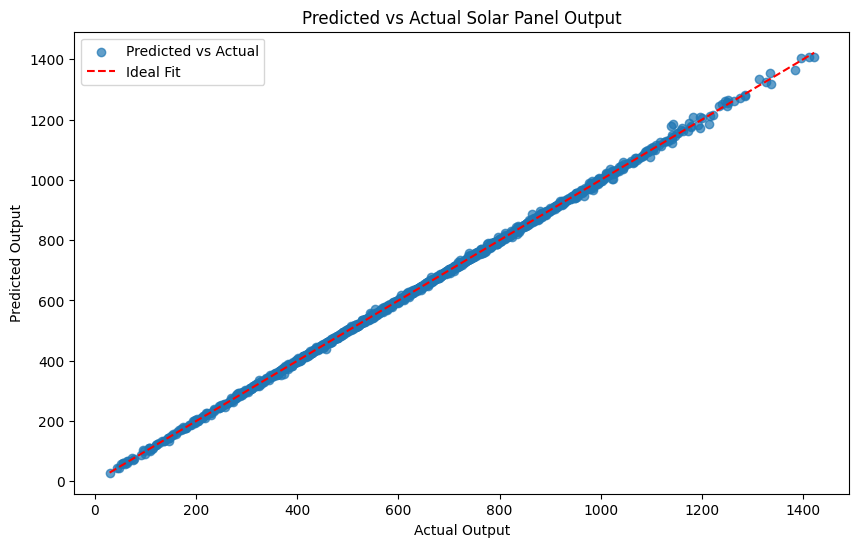

In [ ]:
# Import necessary libraries
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/solar_data_2023.csv')

# Step 2: Preprocess the data
# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Select relevant features and target variable
features = ['DNI', 'GHI', 'DHI', 'Elevation', 'Azimuth', 'Temperature', 'Cloud_Cover', 'Tilt']
target = 'Output'

X = data[features]  # Independent variables
y = data[target]    # Dependent variable (solar panel output)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train the ML model
# Use a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Step 5: Save the trained model
joblib.dump(model, 'solar_output_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

# Step 6: Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Predicted vs Actual Solar Panel Output")
plt.legend()
plt.show()


In [ ]:
# Load the trained model and scaler
model = joblib.load('solar_output_model.pkl')
scaler = joblib.load('scaler.pkl')

# New data for prediction (example)
new_data = pd.DataFrame({
    'DNI': [700],
    'GHI': [480],
    'DHI': [240],
    'Elevation': [45],
    'Azimuth': [200],
    'Temperature': [30],
    'Cloud_Cover': [20],
    'Tilt': [30]
})

# Preprocess new data
new_data_scaled = scaler.transform(new_data)

# Predict the solar output
predicted_output = model.predict(new_data_scaled)
print(f"Predicted Solar Panel Output: {predicted_output[0]:.2f} W")


Predicted Solar Panel Output: 893.72 W
